In [5]:
#Supporting packages for analysis
import numpy as np
import pandas as pd

#KSTAR imports
from kstar import config
from kstar.plot import DotPlot

import sys
sys.path.append('../')
import conf #This is the local config file for setting the supplements directory to your local environment


#Set matplotlib defaults for arial 12 point font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 12
import matplotlib.pyplot as plt

#Directory where KSTAR Supplemental data was set 
odir = conf.SUPPLEMENTS_DIR+'Control_Experiments (Fig2)/EGF_184A1_HER2_WolfYadlin2006'

#load the Mann Whitney activities and FPR for Tyrosine predictions, 
#it will be faster and less data than loading all KSTAR outputs
activities = pd.read_csv(odir+'/RESULTS/EGF_HER2_Y_mann_whitney_activities.tsv', sep='\t', index_col=0)
fpr = pd.read_csv(odir+'/RESULTS/EGF_HER2_Y_mann_whitney_fpr.tsv', sep='\t', index_col=0)


        
#set preferred kinase names (make a kinase_dict)
kinase_dict = {}
for kinase in activities.index:
    kinase_dict[kinase] = conf.KINASE_MAP.loc[kinase,'Preferred Name']

In [7]:
#set up a description table
cell_dict = {}
treatment_dict = {}
for col in activities.columns:
    label = col.split(':')
    descr = label[1]
    descr_labels = descr.split('_')
    cell_dict[col] = descr_labels[0]
    treatment_dict[col] = descr_labels[1]
    

In [8]:
temp1 = pd.DataFrame.from_dict(cell_dict, orient='index', columns=['Cell Type'])
temp2 = pd.DataFrame.from_dict(treatment_dict, orient='index', columns=['Growth Factor'])
s1 = temp1.join(temp2)
s1['ID'] = s1.index

In [5]:
s1

,Cell Type,Growth Factor,ID
data:24H_EGF_0(min),24H,EGF,data:24H_EGF_0(min)
data:24H_EGF_5(min),24H,EGF,data:24H_EGF_5(min)
data:24H_EGF_10(min),24H,EGF,data:24H_EGF_10(min)
data:24H_EGF_30(min),24H,EGF,data:24H_EGF_30(min)
data:24H_HRG_0(min),24H,HRG,data:24H_HRG_0(min)
data:24H_HRG_5(min),24H,HRG,data:24H_HRG_5(min)
data:24H_HRG_10(min),24H,HRG,data:24H_HRG_10(min)
data:24H_HRG_30(min),24H,HRG,data:24H_HRG_30(min)
data:P_EGF_0(min),P,EGF,data:P_EGF_0(min)
data:P_EGF_5(min),P,EGF,data:P_EGF_5(min)


(array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
        135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255,
        265, 275, 285, 295, 305, 315, 325, 335, 345, 355, 365, 375, 385,
        395, 405, 415, 425, 435, 445, 455, 465, 475, 485, 495]),
 [])

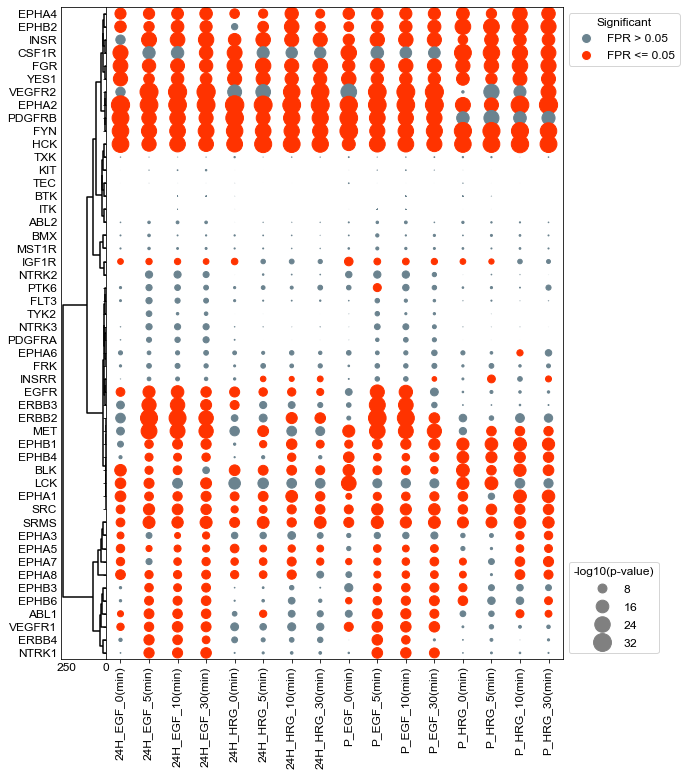

In [9]:

results = activities
sig=fpr
results = -np.log10(results)

#Setup a figure with a context strip at the top for HER2 status and activity dots on the below axis
fig, axes = plt.subplots(figsize = (9, 12), 
        nrows = 1, ncols = 2, 
        sharex = 'col', 
        sharey = 'row',
        gridspec_kw = {
            'width_ratios':[0.1,1]
        },)
fig.subplots_adjust(wspace=0, hspace=0)

dots = DotPlot(results, 
                       sig, 
                       figsize = (9,12), 
                       dotsize = 10, 
                       legend_title='-log10(p-value)', kinase_dict=kinase_dict)
#Cluster changes the sorting of the values array, so be sure to plot context last so that it is in the same sort.
#dots.drop_kinases_with_no_significance()

dots.cluster(orientation = 'left', ax = axes[0], method='ward')
#dots.cluster(orientation = 'top', ax = axes[0,1], method='ward')
#dots.context(ax=axes[1,1], info = s1_temp, id_column = 'ID', context_columns = ['response', 'Patient ID'], orientation = 'top', dotsize =200, markersize= 15 )

dots.dotplot(ax = axes[1])
#plt.xlabel('Time (minutes)', FontSize=12)
#plt.xticks(rotation = 45, FontSize=12)
plt.yticks(FontSize=12)
#plt.savefig(odir+'WolfYadlin2006_all.pdf', bbox_inches='tight')

## Plot just EGF HMEC data for comparison to MRM experiment

(array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
        135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255,
        265, 275, 285, 295, 305, 315, 325, 335]),
 [])

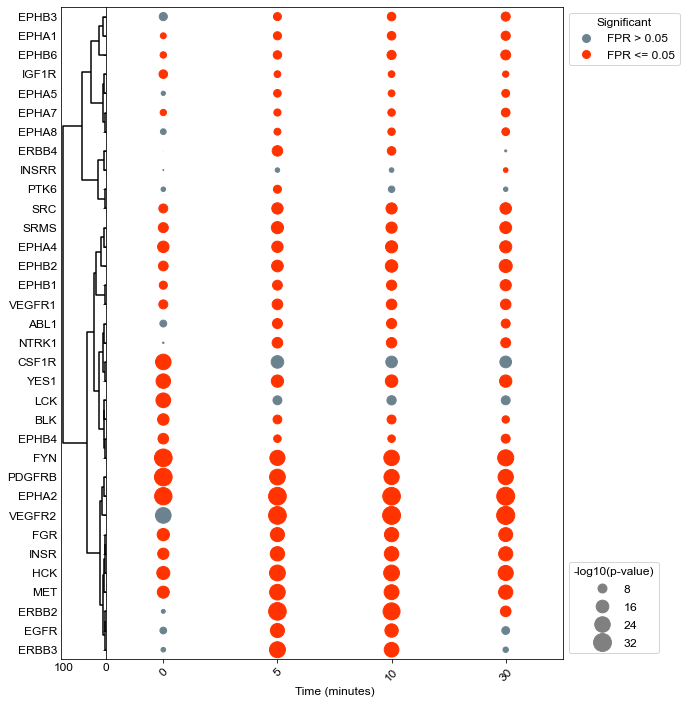

In [11]:

results = activities

#take the subset of headers
colDict = {}
colDict['data:P_EGF_0(min)'] = '0'
colDict['data:P_EGF_5(min)'] = '5'
colDict['data:P_EGF_10(min)'] = '10'
colDict['data:P_EGF_30(min)'] = '30'

results = results[colDict.keys()]
sig = fpr[colDict.keys()]
results = -np.log10(results)

#Setup a figure with a context strip at the top for HER2 status and activity dots on the below axis
fig, axes = plt.subplots(figsize = (9, 12), 
        nrows = 1, ncols = 2, 
        sharex = 'col', 
        sharey = 'row',
        gridspec_kw = {
            'width_ratios':[0.1,1]
        },)
fig.subplots_adjust(wspace=0, hspace=0)

dots = DotPlot(results, 
                       sig, 
                       figsize = (9,12), 
                       dotsize = 10, 
                       legend_title='-log10(p-value)',x_label_dict=colDict, kinase_dict=kinase_dict)
#Cluster changes the sorting of the values array, so be sure to plot context last so that it is in the same sort.
dots.drop_kinases_with_no_significance()

dots.cluster(orientation = 'left', ax = axes[0], method='ward')
#dots.cluster(orientation = 'top', ax = axes[0,1], method='ward')
#dots.context(ax=axes[1,1], info = s1_temp, id_column = 'ID', context_columns = ['response', 'Patient ID'], orientation = 'top', dotsize =200, markersize= 15 )

dots.dotplot(ax = axes[1])
plt.xlabel('Time (minutes)', fontsize=12)
plt.xticks(rotation = 45, fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig(odir+'EGF_HMEC_4timepoint_all.pdf', bbox_inches='tight')

## Reshape results and plot to compare kinase between conditions

In [12]:
def reshape_results(df, kinase, order):
    """
    df could be activities or fpr, this will reshape for a specific kinase a new dataframe for plotting by  condition
    according to order
    
    """
    times = ['0(min)', '5(min)', '10(min)', '30(min)']
    series = df.loc[kinase]
        #reshape for each 
    newDict = {}
    for name in order:
        #newName = kinase+' '+name
        newName = name #name is the experiment, such as P_EGF
        newName = newName.replace('_', ' ')
        oldName_base = 'data:'+name
        newDict[newName] = []
        for time in times:
            strName = oldName_base+'_'+time
            newDict[newName].append(series[strName])
    df_out = pd.DataFrame.from_dict(newDict, orient='index', columns=times)
    return df_out

In [15]:
def plot_results(activities, fpr):
    results = activities
    results = -np.log10(results)


    #Setup a figure with a context strip at the top for HER2 status and activity dots on the below axis
    fig, axes = plt.subplots(figsize = (2, 2), 
            nrows = 1, ncols = 1)
    fig.subplots_adjust(wspace=0, hspace=0)

    dots = DotPlot(results, 
                           fpr, 
                           figsize = (2,2), 
                           dotsize = 5, 
                           legend_title='-log10(p-value)', 
                           x_label_dict = {'0(min)': '0', '5(min)': '5', '10(min)': '10', '30(min)': '30'})

    dots.dotplot(ax = axes, max_size=32)
    plt.xticks(rotation = 45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Time (min)', fontsize=14)

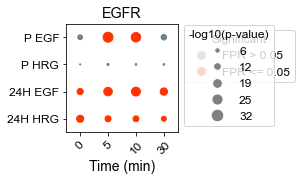

In [25]:
#kinases = ['ERBB2', 'EGFR'] #'ERBB3']
kinases = ['EGFR']
for kinase in kinases:

    df = activities
    order = ['P_EGF', 'P_HRG', '24H_EGF', '24H_HRG']

    activities_new = reshape_results(df, kinase, order)
    fpr_new = reshape_results(fpr, kinase, order)

    plot_results(activities_new, fpr_new)
    plt.title(kinase)
    #plt.savefig(odir+'Subset_'+kinase+'.pdf', bbox_inches='tight')